Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohamed Abdelaziz | 12137202 | 29.04.2022, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; The Vanishing Gradient Problem (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Brandstetter, A. Schörgenhumer<br>
<b>Date:</b> 22-03-2022

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> Set the random seed with <code>u2.set_seed(23)</code> to enable reproducible results in all tasks that incorporate randomness (e.g., t-SNE, splitting data intro train and test sets, initializing weights of a neural network, running the model optimization with random batches, etc.). You must use <code>23</code> as seed.
</div>

In [1]:
# Import pre-defined utilities specific to this notebook.
import u2_utils as u2

# Import additional utilities needed in this notebook.
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from typing import Dict, Sequence

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u2.setup_jupyter()

# Check minimum versions.
u2.check_module_versions()

Installed Python version: 3.8 (✓)
Installed numpy version: 1.22.2 (✓)
Installed pandas version: 1.4.1 (✓)
Installed PyTorch version: 1.10.2+cu113 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed scipy version: 1.8.0 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed PIL version: 9.0.1 (✓)


<h2>Definition of Auxiliaries</h2>

In this exercise, you will be working with a data set composed of images of various handwritten digits. It is probably <i>the</i> most prominent data set in the domain of machine learning: the <i>MNIST</i> data set. The data set distinguishes <i>ten</i> different classes, one for each digit (<i>zero</i> to <i>nine</i>). For curious minds, more information regarding this data set can be found at:

<center>
    <cite>LeCun, Y., 1998. The MNIST database of handwritten digits. <a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a>.</cite>
</center><br>
    
Before analyzing and tackling the vanishing gradient problem, the data sets needs to be inspected.

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Load the <i>MNIST</i> data set using the appropriate function as supplied by us.</li>
        <li>Split the data set into a training set and a test set in a ratio of $6:1$.</li>
        <li>Visualize the MNIST training set in tabular form.</li>
    </ul>
</div>

In [2]:
u2.set_seed(23)

mnist = u2.load_mnist()
mnist_train, mnist_test = u2.split_data(mnist, test_size=1.0 / 7.0)

mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b><br>
    Determine the following questions programmatically:
    <ul>
        <li>How many samples does the data set contain?</li>
        <li>How many samples does the training and the test set contain?</li>
        <li>How many features does the data set consist of (not counting the class label column <i>digit</i>)?</li>
    </ul>
</div>

In [3]:
print(f'Full Dataset Samples: {mnist.shape[0]}')
print(f'Training Set Samples: {mnist_train.shape[0]}')
print(f'Testing Set Samples: {mnist_test.shape[0]}')
print(f'Features: {mnist_train.drop(columns="digit").shape[1]}')

Full Dataset Samples: 70000
Training Set Samples: 60000
Testing Set Samples: 10000
Features: 784


<div class="alert alert-warning">
    <b>Exercise 1.3. [7 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the MNIST training set using <i>t-SNE</i>. To avoid long computation times, select a subset of the training data with $n=5000$ samples, and then perform <i>PCA</i> with $50$ components first. Afterwards, apply t-SNE with $2$ components on this PCA data (choose the perplexity yourself).</li>
        <li>Visualize the t-SNE downprojection.</li>
    </ul>
</div>

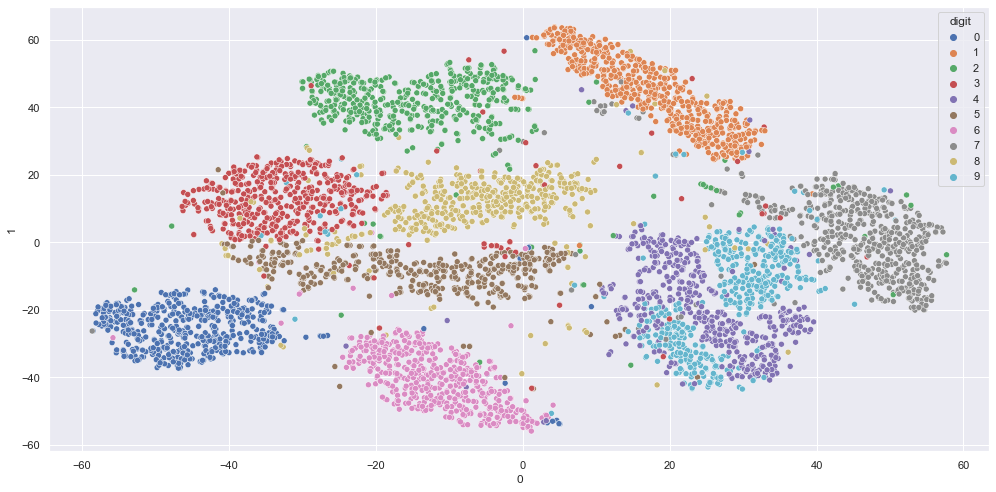

In [4]:
u2.set_seed(23)

# 5000 Samples
mnist_train_samples = mnist.sample(n=5000)
mnist_train_samples_X = mnist_train_samples.drop(columns='digit')
mnist_train_samples_y = mnist_train_samples['digit']

# Apply PCA + TSNE
mnist_train_samples_pca = u2.apply_pca(n_components=50, data=mnist_train_samples_X)
mnist_train_samples_tsne = u2.apply_tsne(n_components=2, data=mnist_train_samples_pca, perplexity=50)

# Plot
u2.plot_points_2d(data=mnist_train_samples_tsne, targets=mnist_train_samples_y, figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Comment on the separability of the MNIST training (sub)set with respect to the downprojection.</li>
    </ul>
</div>

* The applied Mehtodology has successfully (Non-linearly) separated some of the classes with unique shape [0,1,2,6]
* It has failed to separate the similar shaped classes [4,9] , [7,9]
* Classes with small similarities in shape [3,5] , [3,8] were also identified with a considerable visual error

<h2>Training of a Neural Network</h2>

Loading and inspecting a new data set is always an exciting moment, but even more exciting is the implementation of a corresponding neural network and applying it to said data set. In this section, you will thus have to implement and train an appropriate neural network model and revisit your knowledge about the <i>forward</i> as well as the <i>backward</i> pass.

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [5]:
def train_and_evaluate(model: torch.nn.Module, optimizer: torch.optim.Optimizer,
                       device: torch.device, num_epochs: int,
                       loader_train: torch.utils.data.DataLoader,
                       loader_test: torch.utils.data.DataLoader) -> None:
    """
    Auxiliary function for training and evaluating a corresponding model.
    
    :param model: model instance to train and evaluate
    :param optimizer: optimizer to use for model training
    :param device: device to use for model training and evaluation
    :param num_epochs: amount of epochs for model training
    :param loader_train: data loader supplying the training samples
    :param loader_test: data loader supplying the test samples
    """
    for epoch in range(num_epochs):
        # Train model instance for one epoch.
        u2.train_network(
            model=model,
            data_loader=loader_train,
            device=device,
            optimizer=optimizer
        )

        # Evaluate current model instance.
        performance = u2.test_network(
            model=model,
            data_loader=loader_train,
            device=device
        )

        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
              f'/ Train loss: {performance[0]:.4f} / Train accuracy: {performance[1]:.4f}')

    # Evaluate final model on test data set.
    performance = u2.test_network(model=model, data_loader=loader_test, device=device)
    print(f'\nTest loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Create a corresponding <tt>TensorDataset</tt> for the training as well as the test set.</li>
        <li>Wrap the previously defined <tt>TensorDataset</tt> instances in separate <tt>DataLoader</tt> instances with a batch size of $64$ (shuffle the training data set).</li>
        <li>Scale the features of the training as well as test set by a factor of $1\,/\,255$, i.e., normalize the data to range $[0; 1]$</li>
    </ul>
</div>

In [6]:
mnist_train_tensor = torch.utils.data.TensorDataset(
                        torch.from_numpy(mnist_train.drop(columns=['digit']).values / 255),
                        torch.from_numpy(mnist_train['digit'].values))

mnist_test_tensor = torch.utils.data.TensorDataset(
                        torch.from_numpy(mnist_test.drop(columns=['digit']).values / 255),
                        torch.from_numpy(mnist_test['digit'].values))

mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_tensor, batch_size=64, shuffle=True)
mnist_test_loader = torch.utils.data.DataLoader(dataset=mnist_test_tensor, batch_size=64, shuffle=True)

<div class="alert alert-warning">
    <b>Exercise 2.2. [10 Points]</b>
    <ul>
        <li>Implement a class <code>FNN_0</code> with the following architecture (square weight matrix means that the input size is equal to the output size):</li>
    </ul>
    <table style="text-align:center;vertical-align:middle">
        <th>Position</th>
        <th>Element</th>
        <th>Comment</th>
        <tr>
            <td>0</td>
            <td>input</td>
            <td>input size = $28\times{}28 = 784$</td>
        </tr>
        <tr>
            <td>1</td>
            <td>fully connected</td>
            <td>$14\times{}14 = 196$ output features</td>
        </tr>
        <tr>
            <td>2</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>3</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>4</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>5</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>6</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>7</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>8</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>9</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>10</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>11</td>
            <td>fully connected</td>
            <td>square weight matrix</td>
        </tr>
        <tr>
            <td>12</td>
            <td>sigmoid</td>
            <td>-</td>
        </tr>
        <tr>
            <td>13</td>
            <td>fully connected</td>
            <td>$10$ output features</td>
        </tr>
    </table>
</div>

In [7]:
class FNN_0(torch.nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 14 * 14)
        self.ac1 = torch.nn.Sigmoid()
        
        self.fc2 = torch.nn.Linear(self.fc1.out_features, self.fc1.out_features)
        self.ac2 = torch.nn.Sigmoid()
        
        self.fc3 = torch.nn.Linear(self.fc2.out_features, self.fc2.out_features)
        self.ac3 = torch.nn.Sigmoid()
                
        self.fc4 = torch.nn.Linear(self.fc3.out_features, self.fc3.out_features)
        self.ac4 = torch.nn.Sigmoid()
                
        self.fc5 = torch.nn.Linear(self.fc4.out_features, self.fc4.out_features)
        self.ac5 = torch.nn.Sigmoid()
                
        self.fc6 = torch.nn.Linear(self.fc5.out_features, self.fc5.out_features)
        self.ac6 = torch.nn.Sigmoid()
        
        self.fc7 = torch.nn.Linear(self.fc6.out_features, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        
        x = self.fc2(x)
        x = self.ac2(x)
        
        x = self.fc3(x)
        x = self.ac3(x)
        
        x = self.fc4(x)
        x = self.ac4(x)
        
        x = self.fc5(x)
        x = self.ac5(x)
        
        x = self.fc6(x)
        x = self.ac6(x)

        return self.fc7(x)

<div class="alert alert-warning">
    <b>Important:</b> Use <code>target_device</code> as the main device to run your calculations on in the following code snippets. Do not modify this code here.
</div>

In [8]:
target_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

<div class="alert alert-warning">
    <b>Exercise 2.3. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_0</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.02$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [9]:
u2.set_seed(23)

fnn0_model = FNN_0().to(target_device)

fnn0_optimizer = torch.optim.SGD(fnn0_model.parameters(), lr=0.02)

print(fnn0_model)

FNN_0(
  (fc1): Linear(in_features=784, out_features=196, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=196, out_features=196, bias=True)
  (ac2): Sigmoid()
  (fc3): Linear(in_features=196, out_features=196, bias=True)
  (ac3): Sigmoid()
  (fc4): Linear(in_features=196, out_features=196, bias=True)
  (ac4): Sigmoid()
  (fc5): Linear(in_features=196, out_features=196, bias=True)
  (ac5): Sigmoid()
  (fc6): Linear(in_features=196, out_features=196, bias=True)
  (ac6): Sigmoid()
  (fc7): Linear(in_features=196, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 2.4. [3 Points]</b>
    <ul>
        <li>Train an <code>FNN_0</code> network for $7$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [10]:
u2.set_seed(23)

train_and_evaluate(
    model=fnn0_model,
    optimizer=fnn0_optimizer,
    device=target_device,
    num_epochs=7,
    loader_train=mnist_train_loader,
    loader_test=mnist_test_loader
)

Epoch: 1 / Train loss: 0.0360 / Train accuracy: 0.1037
Epoch: 2 / Train loss: 0.0361 / Train accuracy: 0.0981
Epoch: 3 / Train loss: 0.0360 / Train accuracy: 0.1037
Epoch: 4 / Train loss: 0.0361 / Train accuracy: 0.1119
Epoch: 5 / Train loss: 0.0361 / Train accuracy: 0.1119
Epoch: 6 / Train loss: 0.0361 / Train accuracy: 0.1018
Epoch: 7 / Train loss: 0.0360 / Train accuracy: 0.1119

Test loss: 0.0362 / Test accuracy: 0.1164


<div class="alert alert-warning">
    <b>Exercise 2.5. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

* The Training Loss did NOT change which implies that the model almost failed to learn anything after the first epoch.
* This is also reflected on the training accuracy as well that slightly fluctuates around the range of 10%.
* This can "but not necessarily" mean that the model is predicting just 1 class for the whole dataset -assuming the dataset is properly balanced-

<div class="alert alert-warning">
    <b>Exercise 2.6. [2 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>forward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

<center>
    \begin{equation}
        \hat{y} = f\left(h_7(h_6(h_5(h_4(h_3(h_2(h_1(\mathbf{x};\mathbf{W}_1);\mathbf{W}_2);\mathbf{W}_4);\mathbf{W}_5);\mathbf{W}_6);\mathbf{W}_7 \right )
    \end{equation}
</center>


or more generally:


<p>
    \begin{equation}
        p(y=10|\mathbf{x}_i) = \frac{e^{\text{NN}_k(\mathbf{x}_i;\mathbf{W})}}{\sum_{10} e^{\text{NN}_j(\mathbf{x}_i;\mathbf{W})}}
    \end{equation}
</p>

<div class="alert alert-warning">
    <b>Exercise 2.7. [3 Points]</b>
    <ul>
        <li>Write down a formula for the corresponding <i>backward</i> pass of <code>FNN_0</code>. Use the same notation as presented during the exercise.</li>
    </ul>
</div>

<center>
    \begin{align*}
        \mathbf{W}_7 & \leftarrow \mathbf{W}_7 - \eta \frac{\partial L}{\partial \mathbf{W}_7} \\
        \mathbf{W}_6 & \leftarrow \mathbf{W}_6 - \eta \frac{\partial L}{\partial h_6}\frac{\partial h_6}{\partial \mathbf{W}_6} \\
        \mathbf{W}_5 & \leftarrow \mathbf{W}_5 - \eta \frac{\partial L}{\partial h_6}\frac{\partial h_6}{\partial h_5}\frac{\partial h_5}{\partial \mathbf{W}_5} \\
        \mathbf{W}_4 & \leftarrow \mathbf{W}_4 - \eta \frac{\partial L}{\partial h_6}\frac{\partial h_6}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial \mathbf{W}_4} \\
        \mathbf{W}_3 & \leftarrow \mathbf{W}_3 - \eta \frac{\partial L}{\partial h_6}\frac{\partial h_6}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial h_3}
    \frac{\partial h_3}{\partial \mathbf{W}_3} \\
        \mathbf{W}_2 & \leftarrow \mathbf{W}_2 - \eta \frac{\partial L}{\partial h_6}\frac{\partial h_6}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial h_3}
    \frac{\partial h_3}{\partial h_2}\frac{\partial h_2}{\partial \mathbf{W}_2} \\
        \mathbf{W}_1 & \leftarrow \mathbf{W}_1 - \eta \frac{\partial L}{\partial h_6}\frac{\partial h_6}{\partial h_5}\frac{\partial h_5}{\partial h_4}\frac{\partial h_4}{\partial h_3}
    \frac{\partial h_3}{\partial h_2}\frac{\partial h_2}{\partial h_1}\frac{\partial h_1}{\partial \mathbf{W}_1}
    \end{align*}
    
</center>

<h2>Analyzing Gradients</h2>

Is the performance problem of <code>FNN_0</code> related to the vanishing gradient problem? This is exactly the point you're going to figure out in this exercise. As a first step, the gradients of a freshly initialized model need to be collected and analyzed. Afterwards, in case of a vanishing gradient problem, countermeasures must be taken.</p>

<div class="alert alert-warning">
    <b>Important:</b> The following code snippet is taken from the accompanying exercise notebook. Do not modify this code here.
</div>

In [11]:
def collect_gradients(model: torch.nn.Module, device: torch.device,
                      loader: torch.utils.data.DataLoader) -> Sequence[Dict[str, np.array]]:
    """
    Auxiliary function for collecting gradients of a corresponding model.
    
    :param model: model instance to be used for collecting gradients
    :param device: device to use for gradient collection
    :param loader: data loader supplying the samples used for collecting gradients
    :return: sequence of parameter names and gradients, averaged over all parameter elements
    """
    model_state = model.training
    model.train()
    model.zero_grad()
    
    # Iterating over the data set and computing the corresponding gradients.
    # Since we are only interested in the gradients, we can skip the optimization step.
    gradients = {}
    criterion = torch.nn.CrossEntropyLoss()
    
    for data, target in loader:
        data, target = data.float().to(device), target.long().to(device)
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
    
        # Collecting the (averaged absolute) gradients from the current model.
        for name, parameter in model.named_parameters():
            if "weight" in name and parameter.grad is not None:
                gradients.setdefault(name, []).append(parameter.grad.view(-1).abs().mean().item())
        model.zero_grad()
    
    # Reset model state and return collected gradients.
    model.train(mode=model_state)
    return gradients

<div class="alert alert-warning">
    <b>Exercise 3.1. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_0</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [12]:
u2.set_seed(23)

fnn0_model = FNN_0().to(target_device)

fnn0_optimizer = torch.optim.SGD(fnn0_model.parameters(), lr=0.02)

gradients_0 = [(fnn0_model, collect_gradients(model=fnn0_model, device=target_device, loader=mnist_train_loader))]

<div class="alert alert-warning">
    <b>Exercise 3.2. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly.</li>
    </ul>
</div>

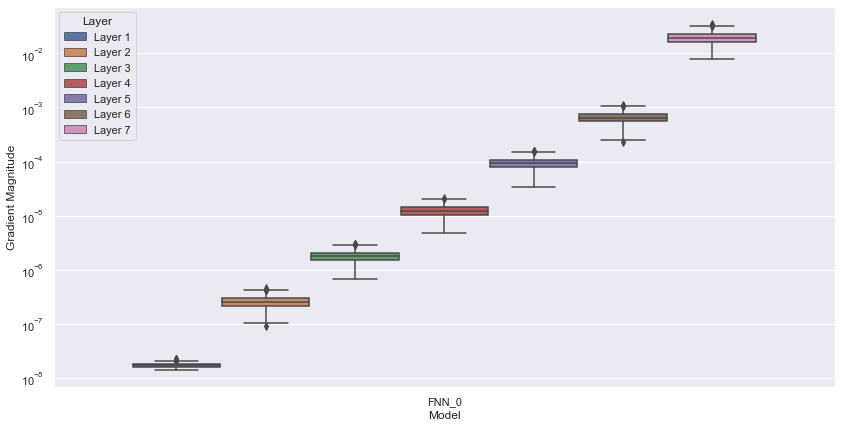

In [13]:
# Prepare collected gradients for plotting.
gradient_dfs = []
for model, gradient in gradients_0:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data["Model"] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_df = pd.concat(gradient_dfs)

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.set(yscale='log')

# Plot pre-processed gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.3. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

* There is a clear linear relationship between the layer position in the network and the magnitude of its gradients.
* The more we dive deeper the larger the gradient which means that during back propagation the gradients kept decreasing exponentially "due to continuous derviatives resulting in a very small values of the gradients in the very first layers"
* This means that the updates done on the first layers are very small that prevents the network from training.

<div class="alert alert-warning">
    <b>Exercise 3.4. [10 Points]</b>
    <ul>
        <li>Assume a vanishing gradient. Apply the countermeasure presented during the accompanying exercise by implementing a corresponding <code>FNN_1</code> network.</li>
    </ul>
</div>

In [14]:
class FNN_1(torch.nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 14 * 14)
        self.ac1 = torch.nn.Sigmoid()
        
        self.fc2 = torch.nn.Linear(self.fc1.out_features, self.fc1.out_features)
        self.ac2 = torch.nn.ReLU()
        
        self.fc3 = torch.nn.Linear(self.fc2.out_features, self.fc2.out_features)
        self.ac3 = torch.nn.ReLU()
                
        self.fc4 = torch.nn.Linear(self.fc3.out_features, self.fc3.out_features)
        self.ac4 = torch.nn.ReLU()
                
        self.fc5 = torch.nn.Linear(self.fc4.out_features, self.fc4.out_features)
        self.ac5 = torch.nn.ReLU()
                
        self.fc6 = torch.nn.Linear(self.fc5.out_features, self.fc5.out_features)
        self.ac6 = torch.nn.ReLU()
        
        self.fc7 = torch.nn.Linear(self.fc6.out_features, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.ac1(x)
        
        x = self.fc2(x)
        x = self.ac2(x)
        
        x = self.fc3(x)
        x = self.ac3(x)
        
        x = self.fc4(x)
        x = self.ac4(x)
        
        x = self.fc5(x)
        x = self.ac5(x)
        
        x = self.fc6(x)
        x = self.ac6(x)

        return self.fc7(x)

<div class="alert alert-warning">
    <b>Exercise 3.5. [3 Points]</b>
    <ul>
        <li>Create an instance of <code>FNN_1</code> as well as of a corresponding <code>SGD</code> optimizer with a learning rate of $0.02$.</li>
        <li>Print the resulting model and verify the architecture by inspecting the output.</li>
    </ul>
</div>

In [15]:
u2.set_seed(23)

fnn1_model = FNN_1().to(target_device)

fnn1_optimizer = torch.optim.SGD(fnn1_model.parameters(), lr=0.02)

print(fnn1_model)

FNN_1(
  (fc1): Linear(in_features=784, out_features=196, bias=True)
  (ac1): Sigmoid()
  (fc2): Linear(in_features=196, out_features=196, bias=True)
  (ac2): ReLU()
  (fc3): Linear(in_features=196, out_features=196, bias=True)
  (ac3): ReLU()
  (fc4): Linear(in_features=196, out_features=196, bias=True)
  (ac4): ReLU()
  (fc5): Linear(in_features=196, out_features=196, bias=True)
  (ac5): ReLU()
  (fc6): Linear(in_features=196, out_features=196, bias=True)
  (ac6): ReLU()
  (fc7): Linear(in_features=196, out_features=10, bias=True)
)


<div class="alert alert-warning">
    <b>Exercise 3.6. [3 Points]</b>
    <ul>
        <li>Train an <code>FNN_1</code> network for $7$ epochs, print the training accuracy as well as the loss per epoch and report the final test set loss and accuracy.</li>
    </ul>
</div>

In [16]:
u2.set_seed(23)

train_and_evaluate(
    model=fnn1_model,
    optimizer=fnn1_optimizer,
    device=target_device,
    num_epochs=7,
    loader_train=mnist_train_loader,
    loader_test=mnist_test_loader
)

Epoch: 1 / Train loss: 0.0360 / Train accuracy: 0.1119
Epoch: 2 / Train loss: 0.0360 / Train accuracy: 0.1119
Epoch: 3 / Train loss: 0.0360 / Train accuracy: 0.1119
Epoch: 4 / Train loss: 0.0359 / Train accuracy: 0.1119
Epoch: 5 / Train loss: 0.0347 / Train accuracy: 0.2087
Epoch: 6 / Train loss: 0.0252 / Train accuracy: 0.3585
Epoch: 7 / Train loss: 0.0244 / Train accuracy: 0.3638

Test loss: 0.0241 / Test accuracy: 0.3718


<div class="alert alert-warning">
    <b>Exercise 3.7. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

The Training loss started decreasing and the accuracy increased after the 5th epoch which indicates that the previous hypothesis of a vanishing gradient problem was solved.
This also was reflected on the test set since it has shown a healthy value with no over-fitting, yet a harsh underfitting that can be tested with more epochs to train

<div class="alert alert-warning">
    <b>Exercise 3.8. [3 Points]</b>
    <ul>
        <li>Create a <i>fresh</i> instance of <code>FNN_1</code> and collect its gradients using the MNIST training set.</li>
    </ul>
</div>

In [17]:
u2.set_seed(23)

fnn1_model = FNN_1().to(target_device)

fnn1_optimizer = torch.optim.SGD(fnn1_model.parameters(), lr=0.02)

gradients_1 = [(fnn1_model, collect_gradients(model=fnn1_model, device=target_device, loader=mnist_train_loader))]

<div class="alert alert-warning">
    <b>Exercise 3.9. [3 Points]</b>
    <ul>
        <li>Visualize the gradients of each weight parameter accordingly. Include the gradient visualization of <code>FNN_0</code> to enable a direct comparison.</li>
    </ul>
</div>

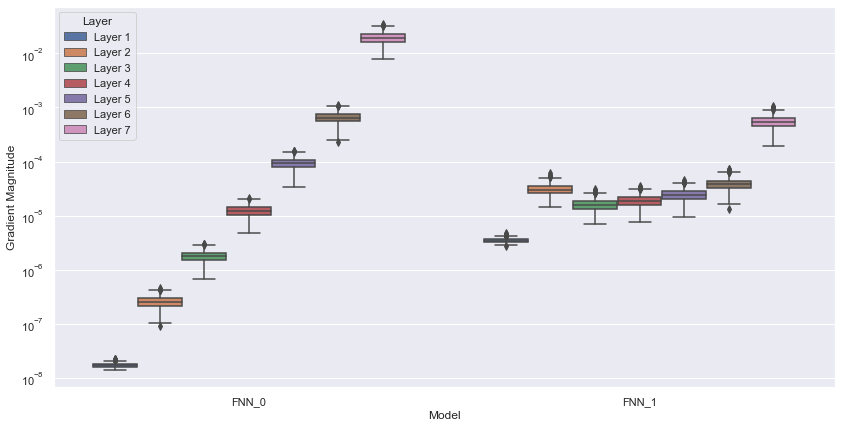

In [18]:
gradients = [*gradients_0, *gradients_1]
gradient_dfs = []
for model, gradient in gradients:
    gradient_data = pd.DataFrame(gradient)
    gradient_data.columns = [f"Layer {i + 1}" for i in range(len(gradient))]
    gradient_data = pd.melt(gradient_data, var_name="Layer", value_name="Gradient Magnitude")
    gradient_data["Model"] = type(model).__name__
    gradient_dfs.append(gradient_data)

# Combine all gradients in a single data frame.
gradients_df = pd.concat(gradient_dfs)

# Define plotting figure and corresponding attributes.
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.set(yscale='log')

# Plot pre-processed gradients.
sns.boxplot(x='Model', y='Gradient Magnitude', hue='Layer', data=gradients_df, ax=ax)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 3.10. [2 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

In the Second Model [FNN_1] the almost all the gradients lie within the same range which indicates that the vanishing gradients problems has decreased significantly after using Rectified linear units instead of the sigmoid function as activation and that confirms the previous hypothesis.

<h2>Deriving Derivatives</h2>

It is already known from the lecture as well as the exercise that <i>activation</i> functions are the primary culprit of the <i>Vanishing Gradient Problem</i>. Hence, it is important to know <i>how</i> the chosen activation functions activate the input and consequently what the <i>derivative</i> is.

<div class="alert alert-warning">
    <b>Exercise 4.1. [4 Points]</b><br>
    Hint: Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Hardsigmoid.html#torch.nn.Hardsigmoid">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>hardsigmoid</code> activation function as it was done for <code>relu</code> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <code>hardsigmoid</code> activation function accordingly.</li>
    </ul>
</div>

In [19]:
def hardsigmoid(x):
    if x <= -3:
        return 0
    elif x >= 3:
        return 1
    else:
        return (x/6)+(1/2)

def hardsigmoid_d(x):
#     Derivative of any constant = 0
#     Derivative of x/6 + 1/2 = 1/6
    if x <= -3 or x >= 3:
        return 0
    else:
        return 1/6

<div class="alert alert-warning">
    <b>Exercise 4.2. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>hardsigmoid</code> activation function.</li>
        <li>Plot the <code>hardsigmoid</code> activation function indluding its derivative for the input range $[-7.5; 7.5]$.</li>
    </ul>
</div>

relu(-10.0):  0.0000 | relu'(-10.0): 0.0000
relu(   -3):  0.0000 | relu'(   -3): 0.0000
relu(  0.0):  0.5000 | relu'(  0.0): 0.1667
relu(    3):  1.0000 | relu'(    3): 0.0000
relu( 10.0):  1.0000 | relu'( 10.0): 0.0000


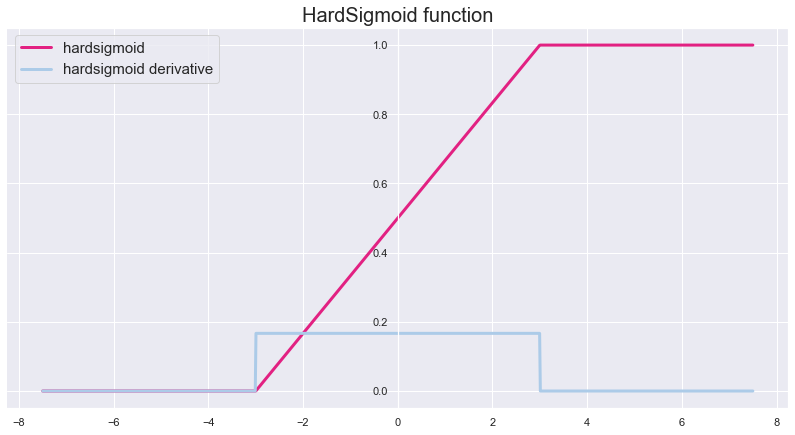

In [20]:
for x in [-10.0, -3, 0.0, 3, 10.0]:
    print(f'relu({x:>5}): {hardsigmoid(x):7.4f} | relu\'({x:>5}): {hardsigmoid_d(x):.4f}')
    

def plot_hardsigmoid(x_min: float = -2.5, x_max: float = 2.5, granularity: int = 1000) -> None:
    """
    Plot the rectified linear unit function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    """
    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(hardsigmoid, data)), color='#e22182', linewidth=3, label='hardsigmoid')
    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(hardsigmoid_d, data_neg)), color='#accbe8', linewidth=3, label="hardsigmoid derivative")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(hardsigmoid_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('HardSigmoid function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot hardsigmoid function including its derivative.
plot_hardsigmoid(x_min=-7.5, x_max=7.5)

<div class="alert alert-warning">
    <b>Exercise 4.3. [4 Points]</b><br>
    Hint: Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>leaky_relu</code> activation function as it was done for <code>relu</code> in the exercise. Use a <i>negative slope</i> of $0.3$.</li>
        <li>Implement the <i>derivative</i> of the <code>leaky_relu</code> activation function accordingly.</li>
    </ul>
</div>

In [21]:
def leaky_relu(x, negative_slope=0.3):
    return x * negative_slope if x < 0 else x

def leaky_relu_d(x, negative_slope=0.3):
#     Derivative of x = 1
#     Derivative of x * constant = constant
    return negative_slope if x < 0 else 1

<div class="alert alert-warning">
    <b>Exercise 4.4. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>leaky_relu</code> activation function.</li>
        <li>Plot the <code>leaky_relu</code> activation function indluding its derivative for the input range $[-7.5; 7.5]$.</li>
    </ul>
</div>

relu(-10.0): -3.0000 | relu'(-10.0): 0.3000
relu(   -3): -0.9000 | relu'(   -3): 0.3000
relu(  0.0):  0.0000 | relu'(  0.0): 1.0000
relu(    3):  3.0000 | relu'(    3): 1.0000
relu( 10.0): 10.0000 | relu'( 10.0): 1.0000


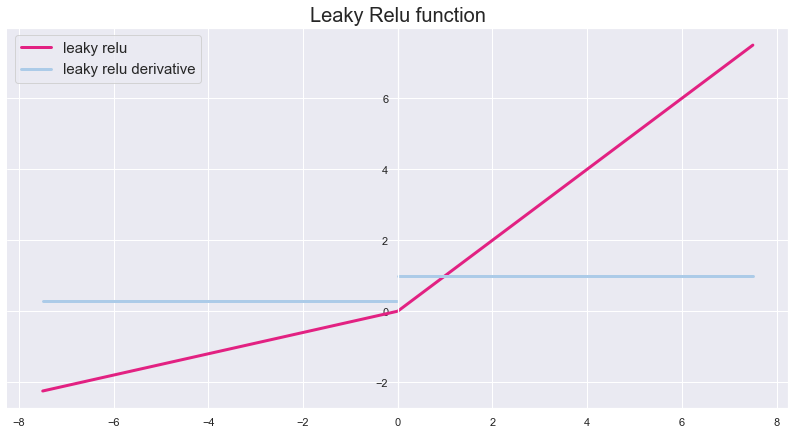

In [22]:
for x in [-10.0, -3, 0.0, 3, 10.0]:
    print(f'relu({x:>5}): {leaky_relu(x):7.4f} | relu\'({x:>5}): {leaky_relu_d(x):.4f}')
    

def plot_leaky_relu(x_min: float = -2.5, x_max: float = 2.5, granularity: int = 1000) -> None:
    """
    Plot the rectified linear unit function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    """
    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(leaky_relu, data)), color='#e22182', linewidth=3, label='leaky relu')
    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(leaky_relu_d, data_neg)), color='#accbe8', linewidth=3, label="leaky relu derivative")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(leaky_relu_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('Leaky Relu function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot hardsigmoid function including its derivative.
plot_leaky_relu(x_min=-7.5, x_max=7.5)

<div class="alert alert-warning">
    <b>Exercise 4.5. [4 Points]</b><br>
    Hint: Take a look at the official <a href="https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh">PyTorch documentation</a> to solve the following tasks:
    <ul>
        <li>Implement the <code>tanh</code> (Hyperbolic Tangent) activation function as it was done for <code>relu</code> in the exercise.</li>
        <li>Implement the <i>derivative</i> of the <code>tanh</code> activation function accordingly.</li>
    </ul>
</div>

In [23]:
def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def tanh_d(x):
#     Derivative of (math.exp(x) + math.exp(−x)) / (math.exp(x) − math.exp(−x)) = 4 / (math.exp(x)+ math.exp(-x)) ** 2
    return 4 / (math.exp(x) + math.exp(-x)) ** 2
#     return 1 - (tanh(x) ** 2)

<div class="alert alert-warning">
    <b>Exercise 4.6. [3 Points]</b>
    <ul>
        <li>Find $5$ different inputs showing the <i>value range</i> of the <code>tanh</code> activation function.</li>
        <li>Plot the <code>tanh</code> activation function indluding its derivative for the input range $[-7.5; 7.5]$.</li>
    </ul>
</div>

Tanh(-10.0): -1.0000 | Tanh'(-10.0): 0.0000
Tanh(   -3): -0.9951 | Tanh'(   -3): 0.0099
Tanh(  0.0):  0.0000 | Tanh'(  0.0): 1.0000
Tanh(    1):  0.7616 | Tanh'(    1): 0.4200
Tanh( 10.0):  1.0000 | Tanh'( 10.0): 0.0000


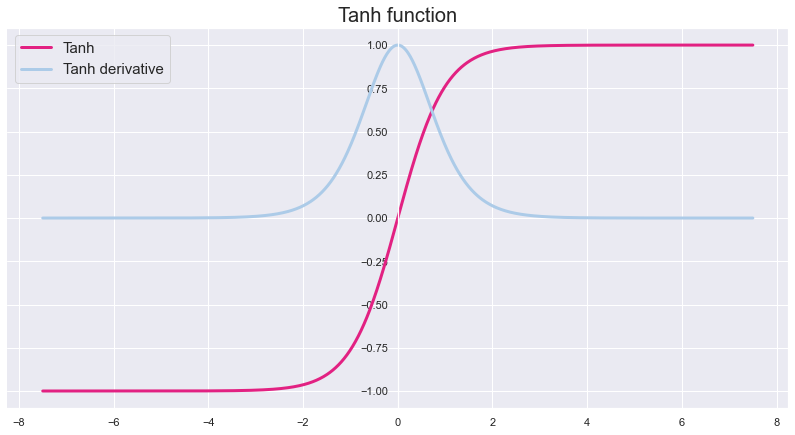

In [24]:
for x in [-10.0, -3, 0.0, 1, 10.0]:
    print(f'Tanh({x:>5}): {tanh(x):7.4f} | Tanh\'({x:>5}): {tanh_d(x):.4f}')
    

def plot_tanh(x_min: float = -2.5, x_max: float = 2.5, granularity: int = 1000) -> None:
    """
    Plot the tanh function including its derivative.
    
    :param x_min: minimum value of the input value range
    :param x_max: maximum value of the input value range
    :param granularity: granularity controlling the stepsize of the input value range
    """
    data = np.linspace(x_min, x_max, granularity)
    data_pivot_neg = np.where(data <= 0)
    data_pivot_pos = np.where(data > 0)

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['left'].set_position('center')

    plt.plot(data, tuple(map(tanh, data)), color='#e22182', linewidth=3, label='Tanh')
    # Plot derivative of negative/positive data separately to avoid a linked line plot.
    if len(data_pivot_neg) > 0:
        data_neg = data[data_pivot_neg]
        plt.plot(data_neg, tuple(map(tanh_d, data_neg)), color='#accbe8', linewidth=3, label="Tanh derivative")
    if len(data_pivot_pos) > 0:
        data_pos = data[data_pivot_pos]
        plt.plot(data_pos, tuple(map(tanh_d, data_pos)), color='#accbe8', linewidth=3)
    plt.title('Tanh function', fontsize=20)
    plt.legend(prop={'size': 15})
    plt.show()

# Plot hardsigmoid function including its derivative.
plot_tanh(x_min=-7.5, x_max=7.5)

<div class="alert alert-warning">
    <b>Exercise 4.7. [2 Points]</b>
    <ul>
        <li>Which of these three activation functions from above do you think is susceptible to the vanishing gradient problem? Expain your decision.</li>
    </ul>
</div>

* **Leaky Relu is NOT susceptible to the vanishing gradient problem** since the outputs of its derivatives are not close to 0 rather either negative_slope or 1.

* **Hard Sigmoid function is prune to the vanishing gradient problem** since it's just another sigmoid function that clips the values of the inputs between [0,1] therfore its derivative is always closer to 0 except for the interval between [-3, 3] that will be equal to 1/6. -which can be faster than the regular sigmoid since it doesn't need to do any calculations in derivatives-

* **Tanh function** also follows the same "clipping" approach as the sigmoid and hardsigmoid but the only difference is that its values lies between [-1,1] in the interval (-3,3) and stays close to either -1 or 1 otherwise, which creates the same bell-shaped derivative curve with a maximum of 1 instead of 0.1 in the case of the sigmoid that makes it **susceptible to the vanishing gradient problem**.